In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv("ToyotaCorolla.csv",encoding="latin1")  # using encoding beacuse we got utf error because of more data

# EDA and data visualization

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [7]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

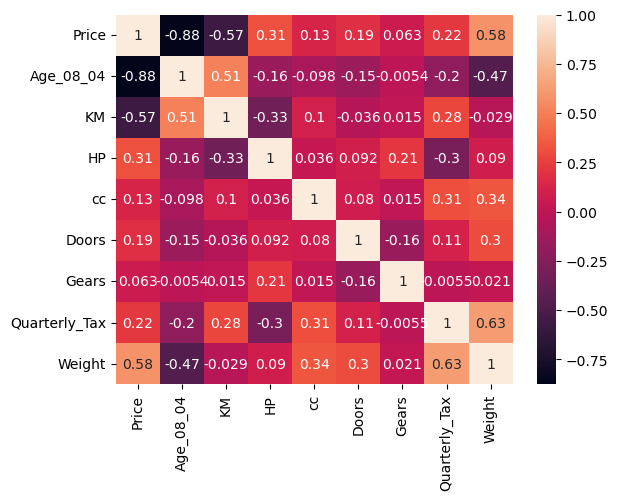

In [9]:
sns.heatmap(data.corr(),annot=True)

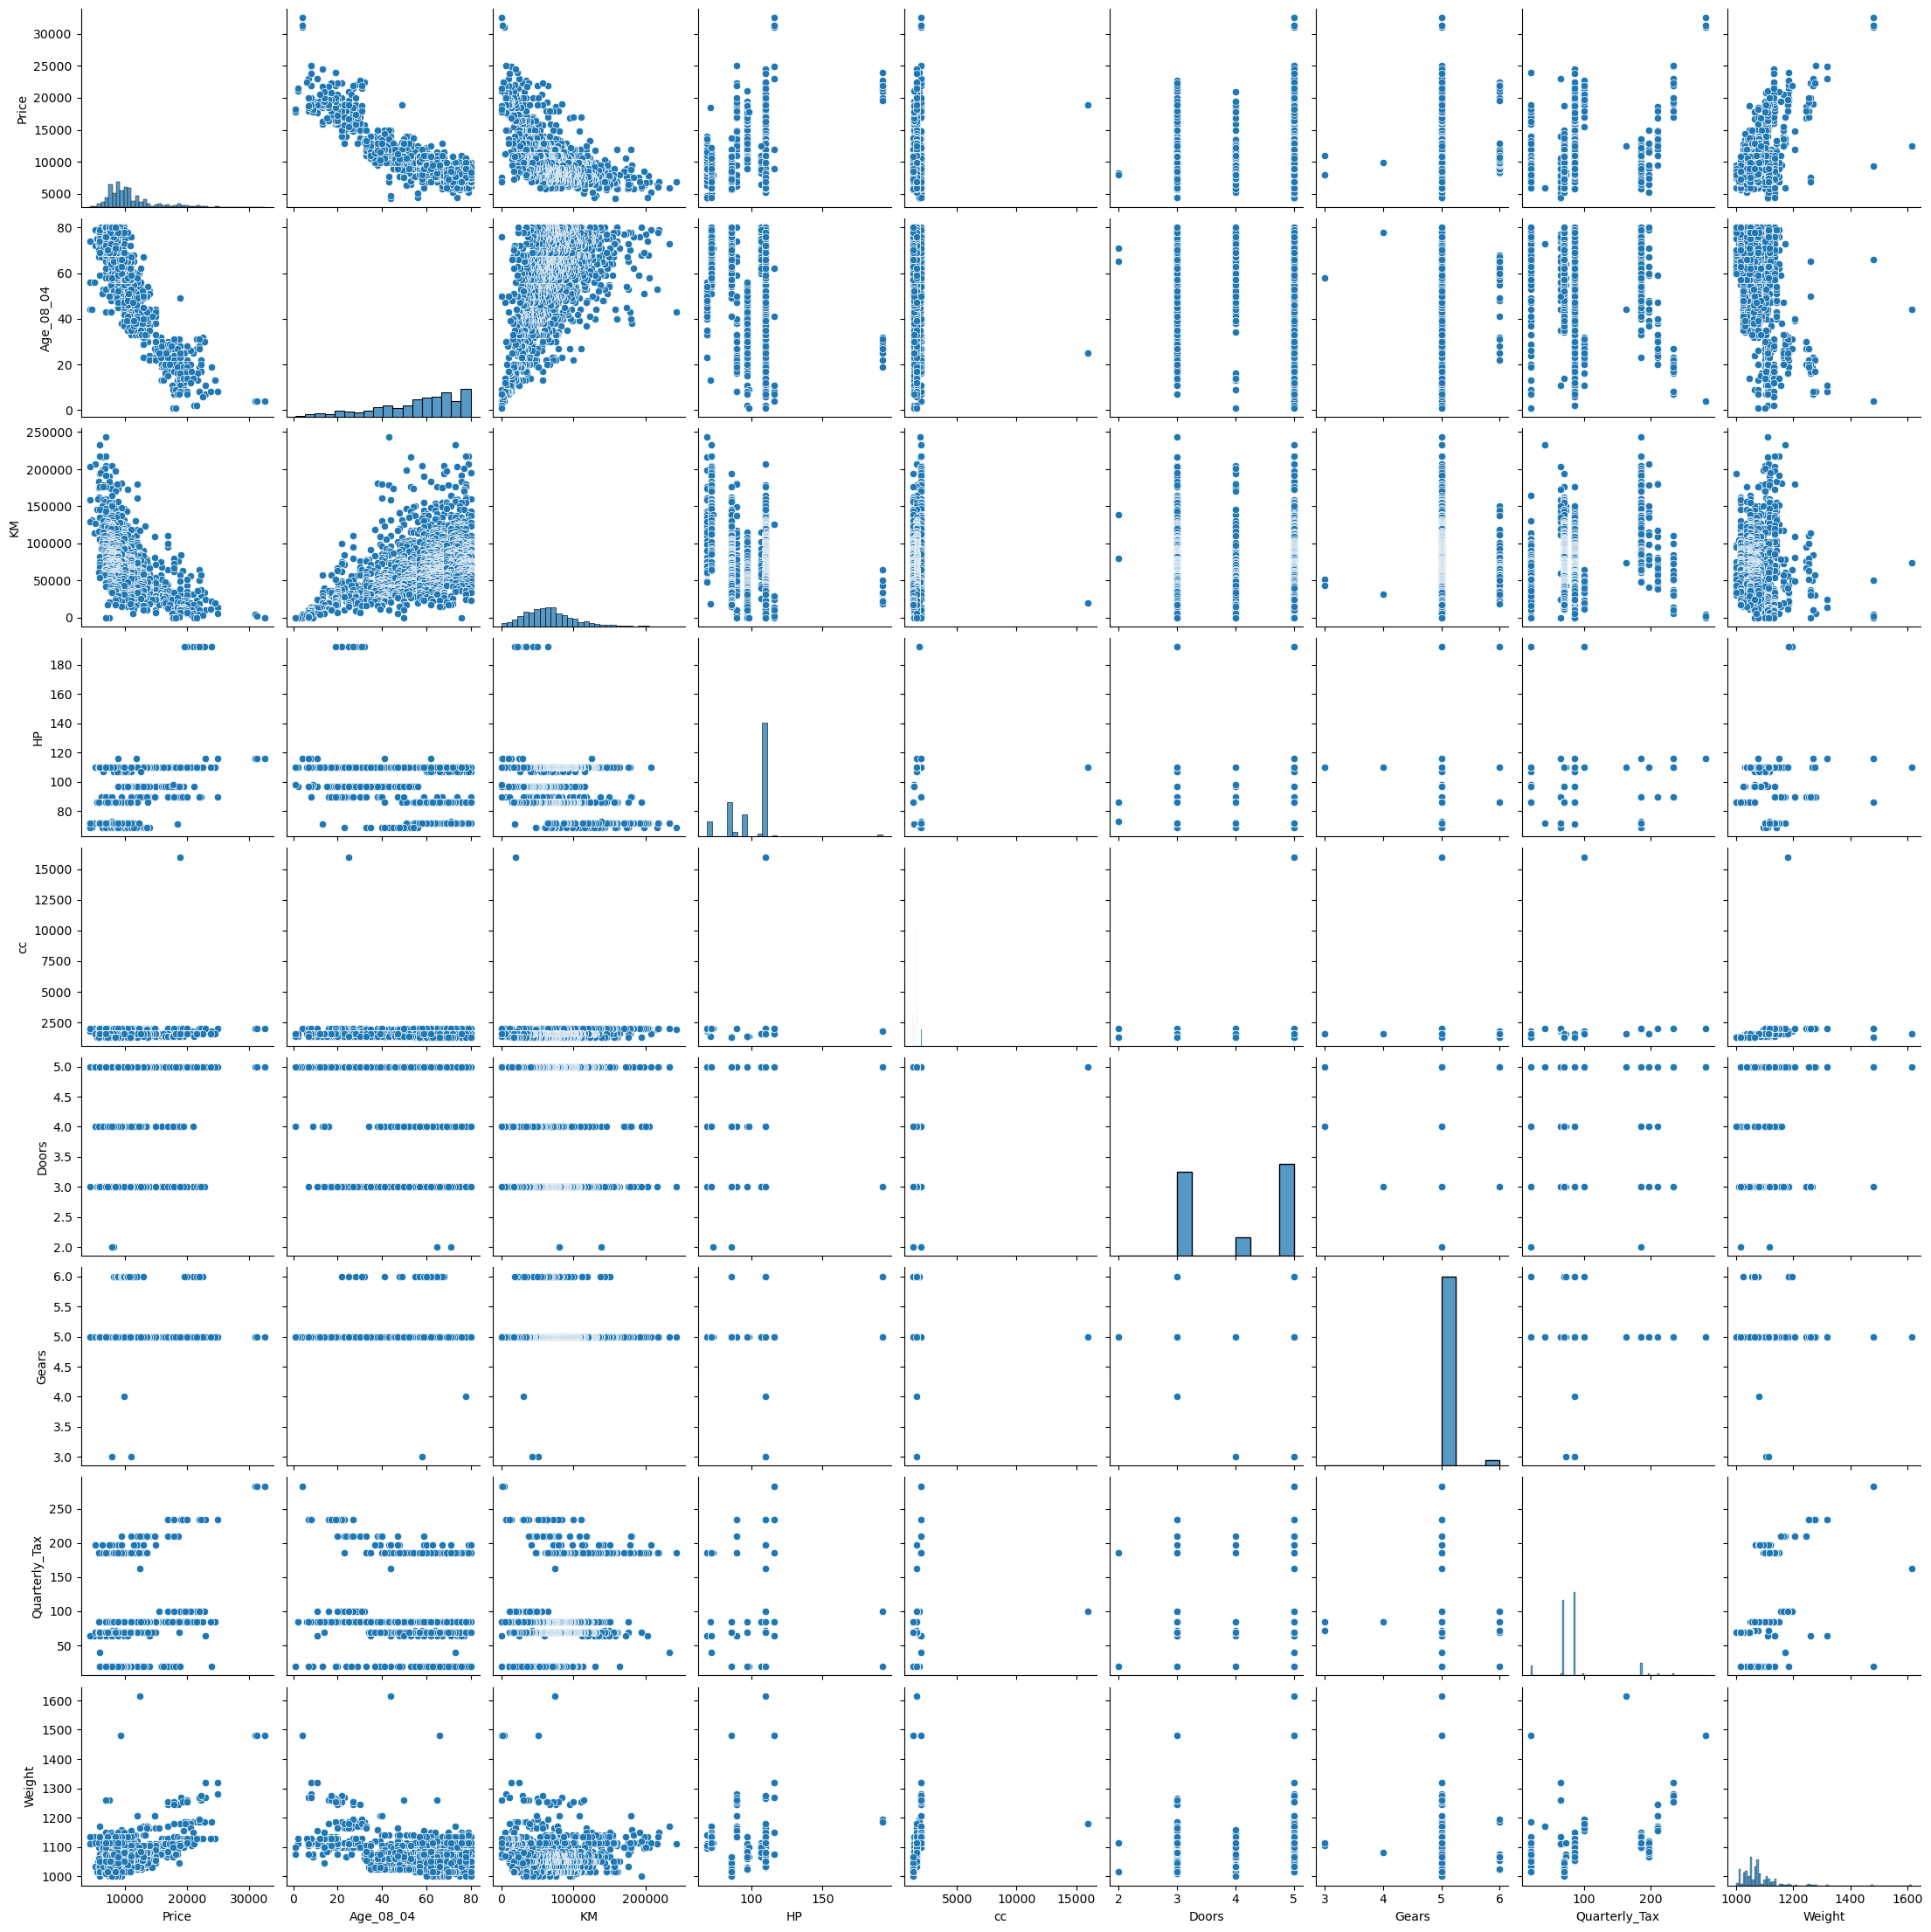

In [10]:
sns.pairplot(data)

In [11]:
rsq_Age = smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM)
rsq_HP = smf.ols("HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP)
rsq_cc = smf.ols("cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc)
rsq_Doors = smf.ols("Doors~KM+HP+cc+Age_08_04+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)
rsq_Gears = smf.ols("Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight",data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)
rsq_Quarterly_Tax = smf.ols("Quarterly_Tax~KM+HP+cc+Doors+Gears+Age_08_04+Weight",data=data).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)
rsq_Weight = smf.ols("Weight~KM+HP+cc+Doors+Gears+Age_08_04+Quarterly_Tax",data=data).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

In [12]:
d1 = {'Variables':["Age","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# model building

In [13]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        17:01:45   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual analysis

### Histogram

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

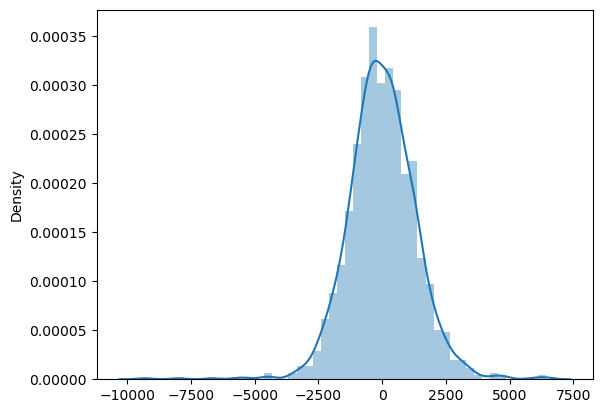

In [14]:
sns.distplot(model.resid)

### QQ plot

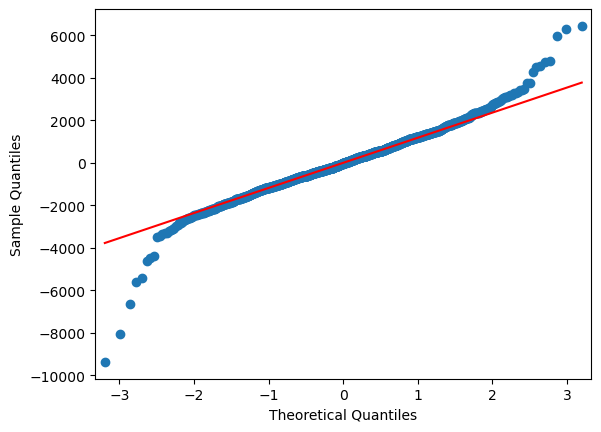

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")
plt.show()

### homoscadasticity

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


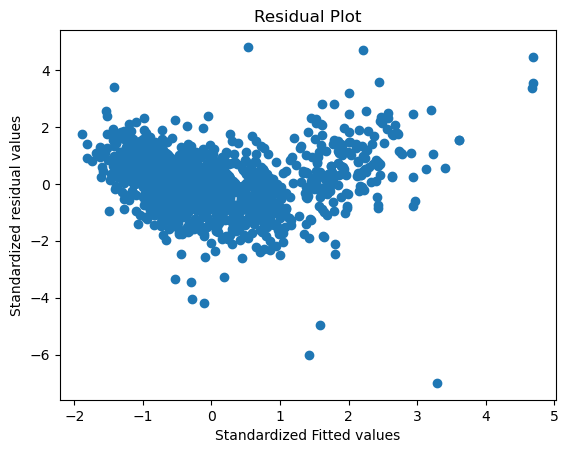

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')  
#fitted = predicted
plt.ylabel('Standardized residual values')
plt.show()

### residual vs regressors

eval_env: 1


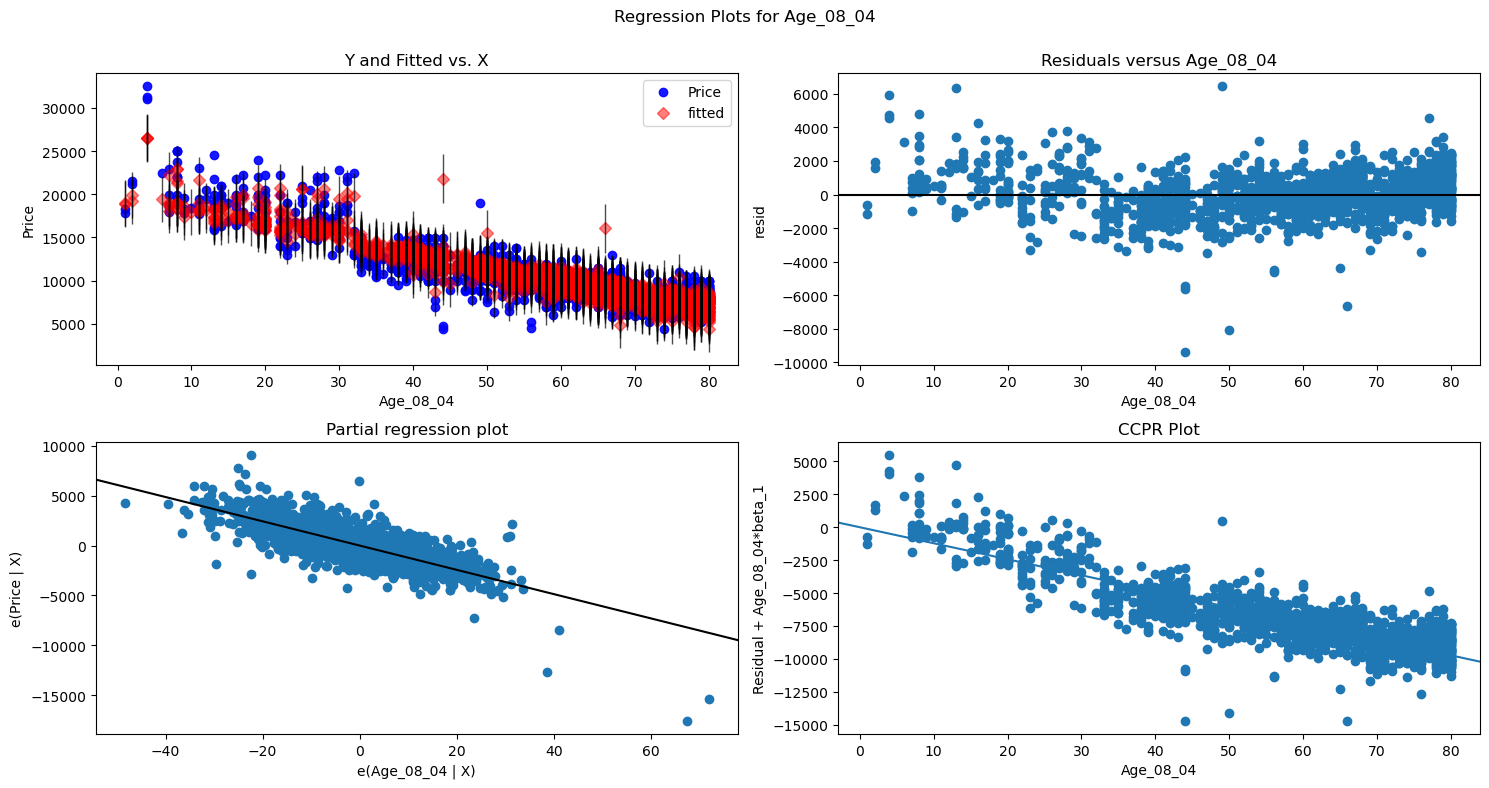

In [18]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


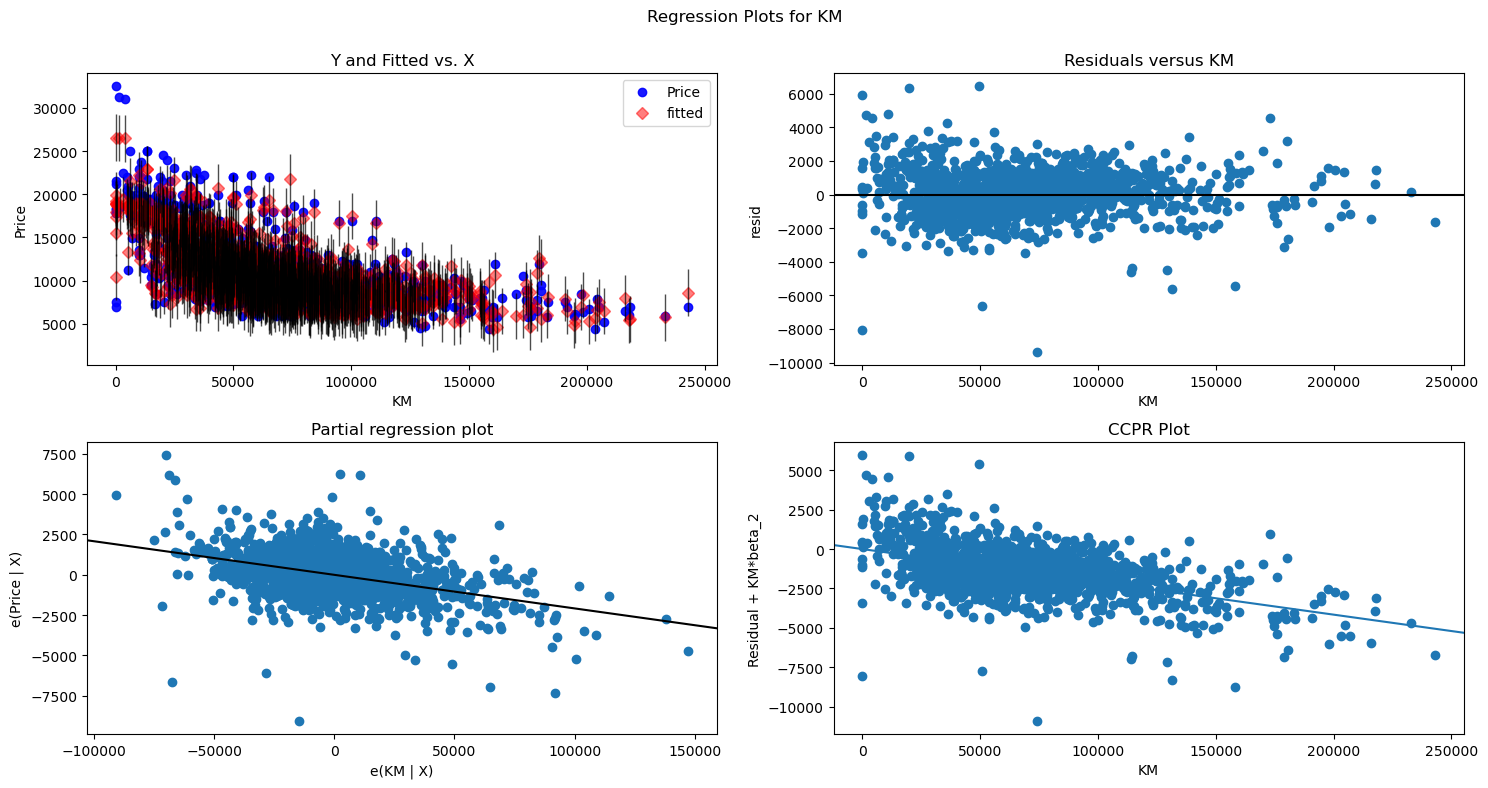

In [19]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


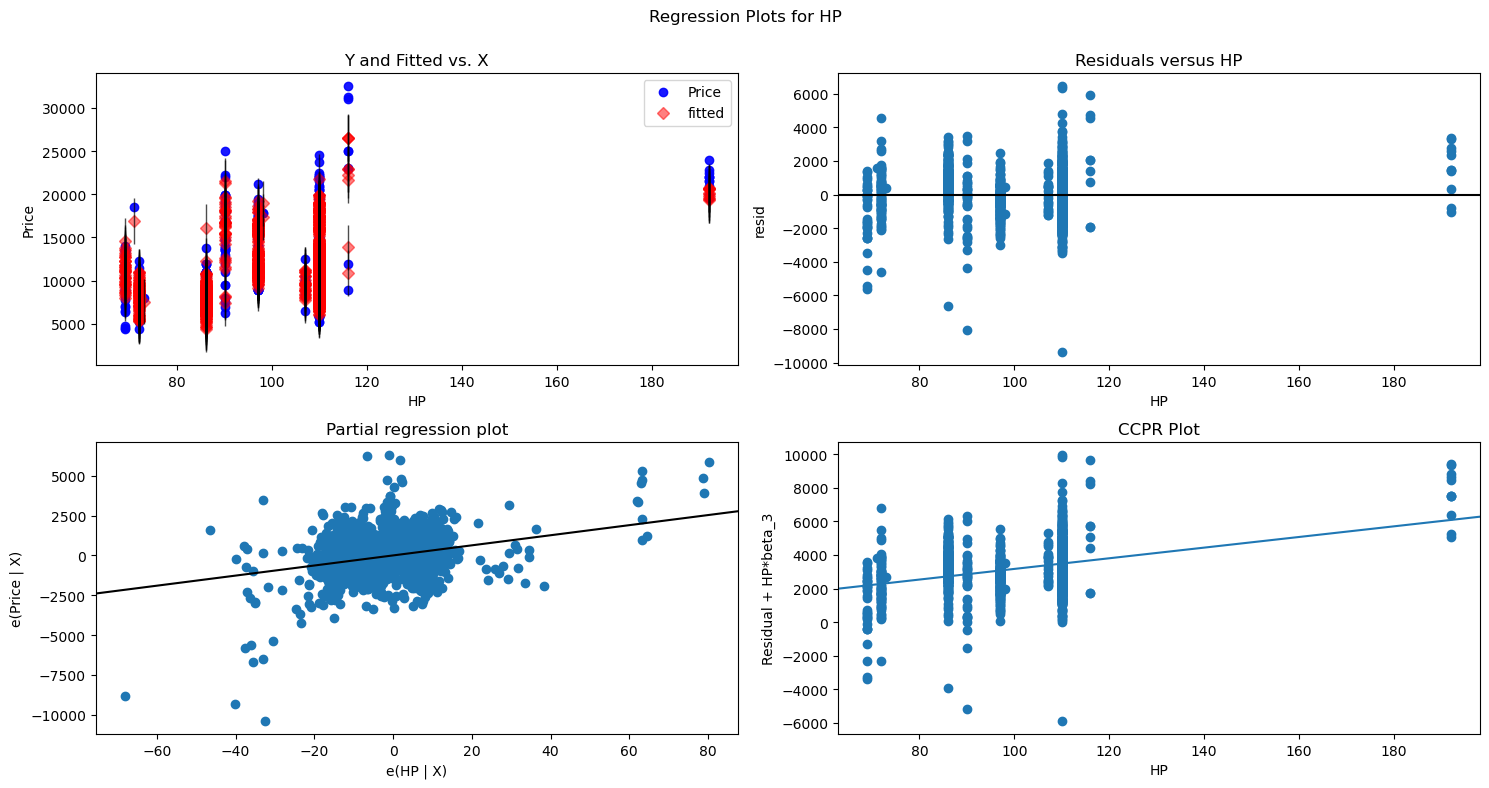

In [20]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


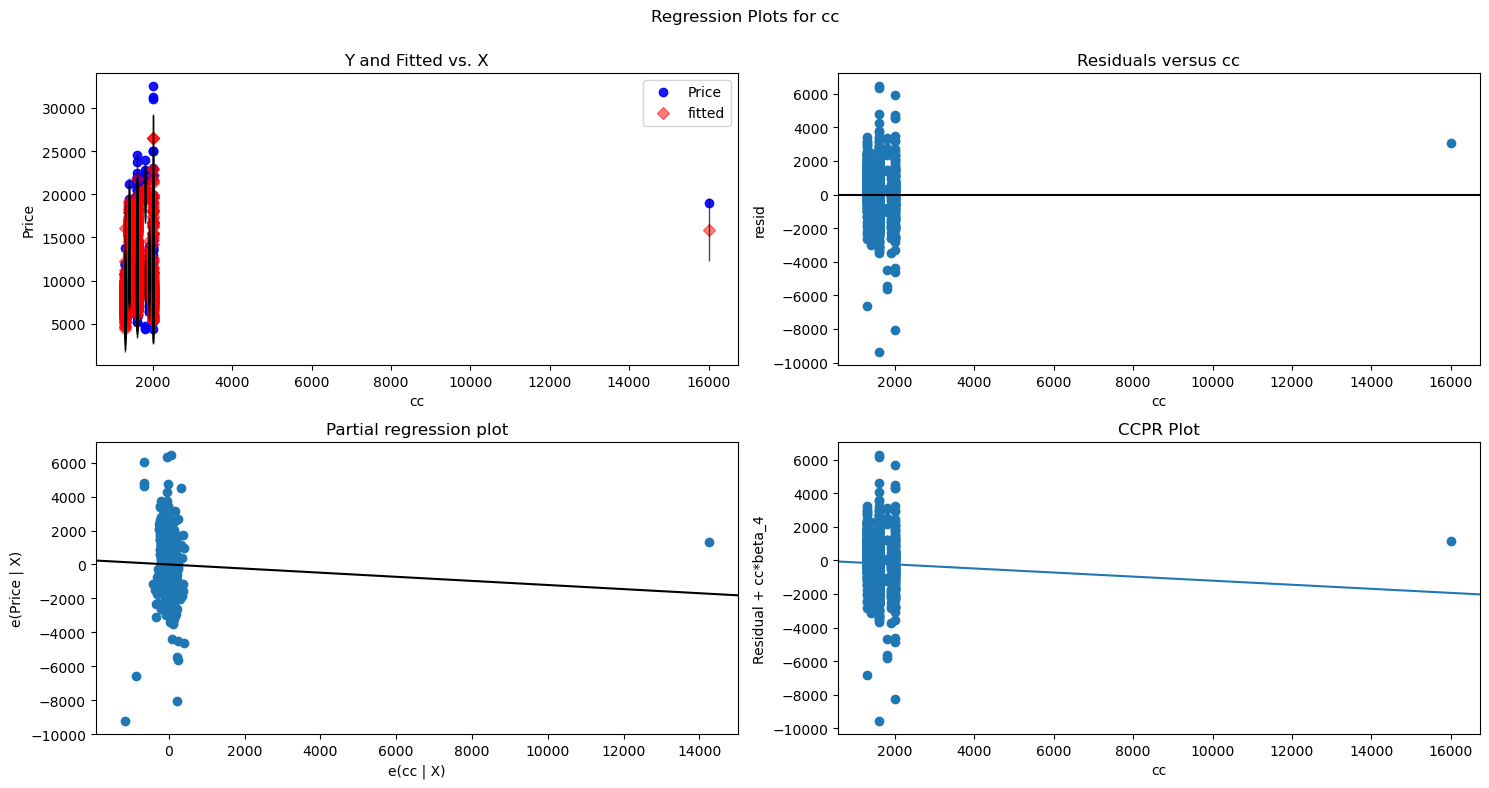

In [21]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


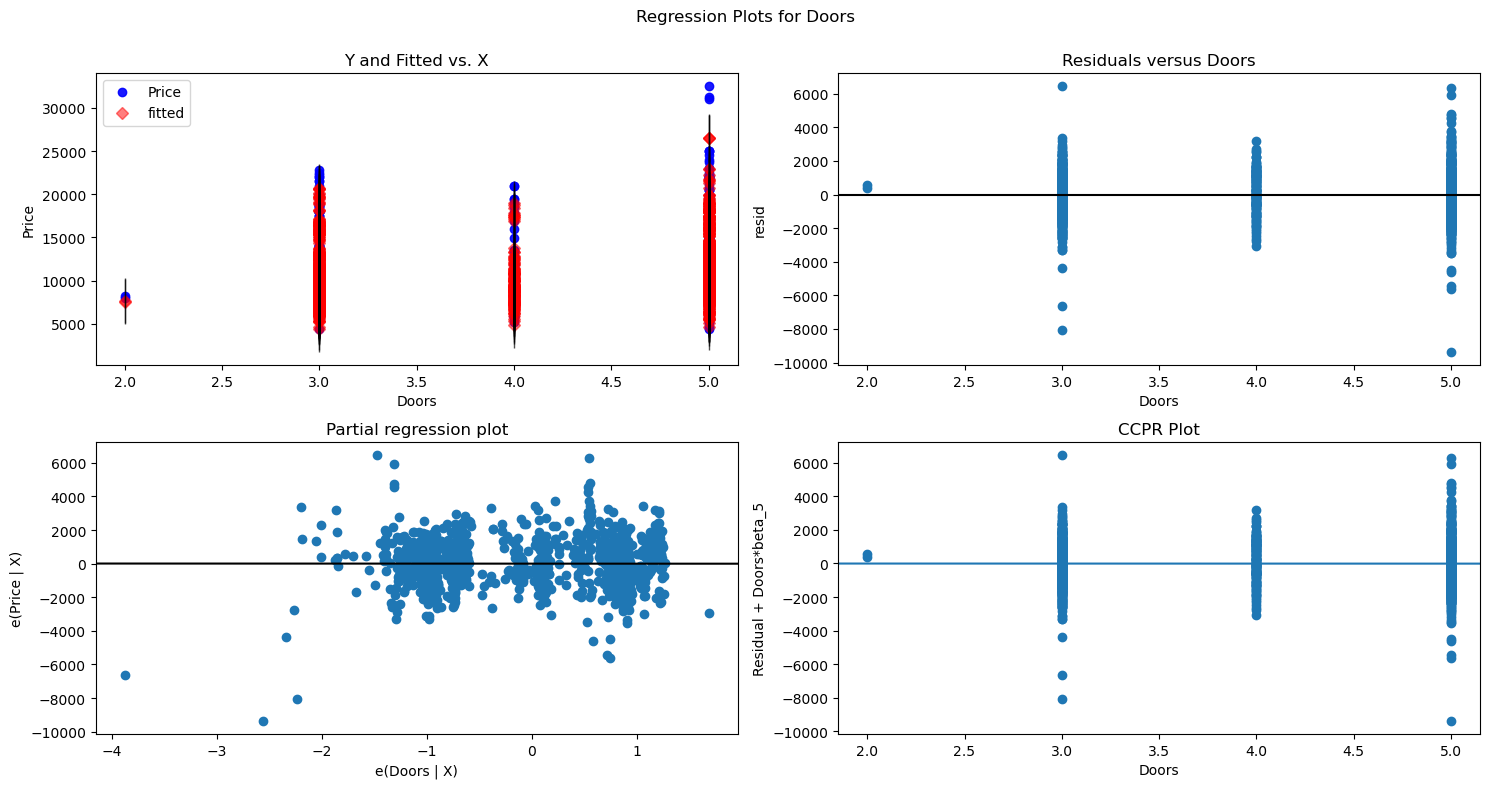

In [22]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


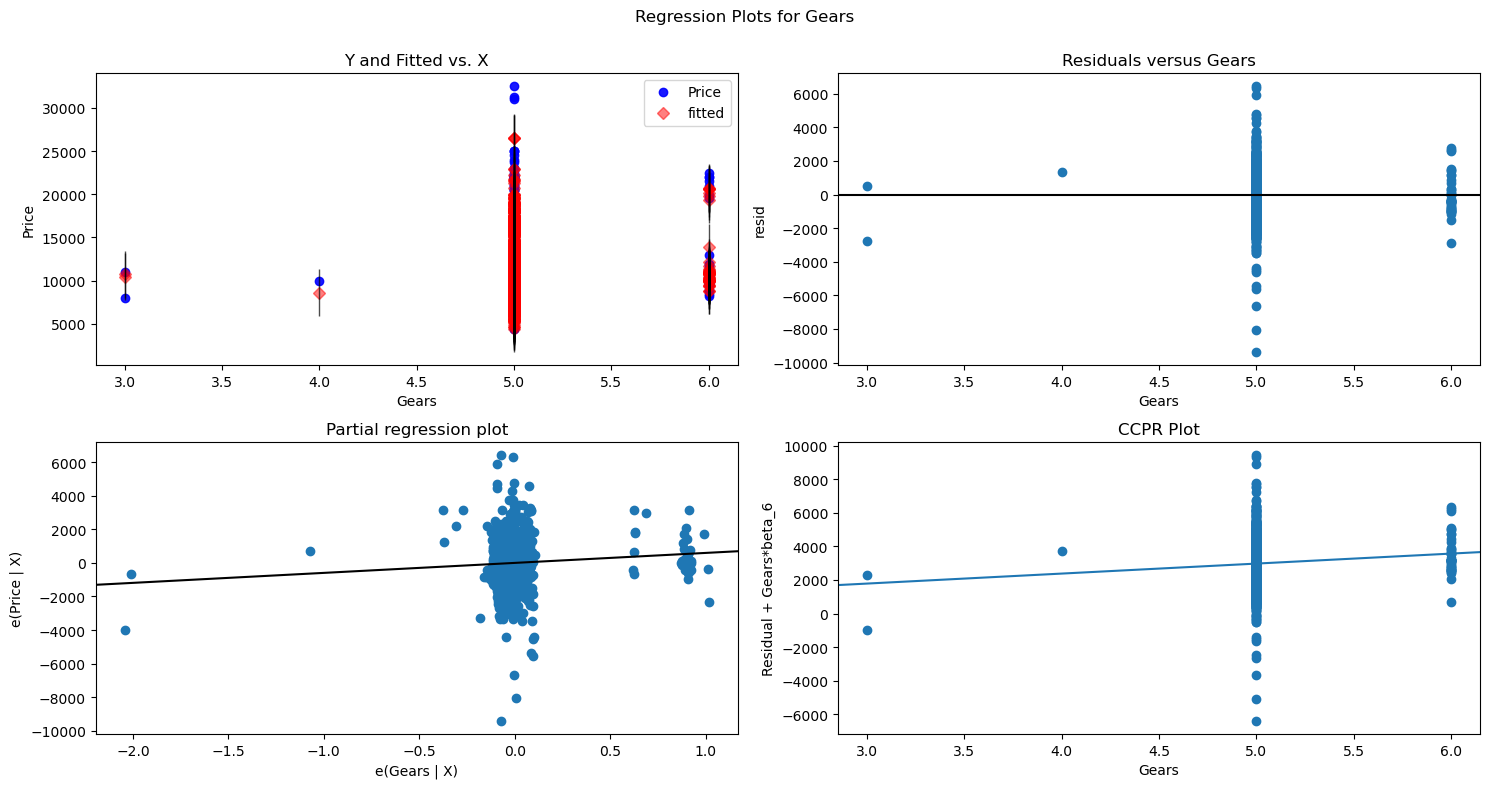

In [23]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


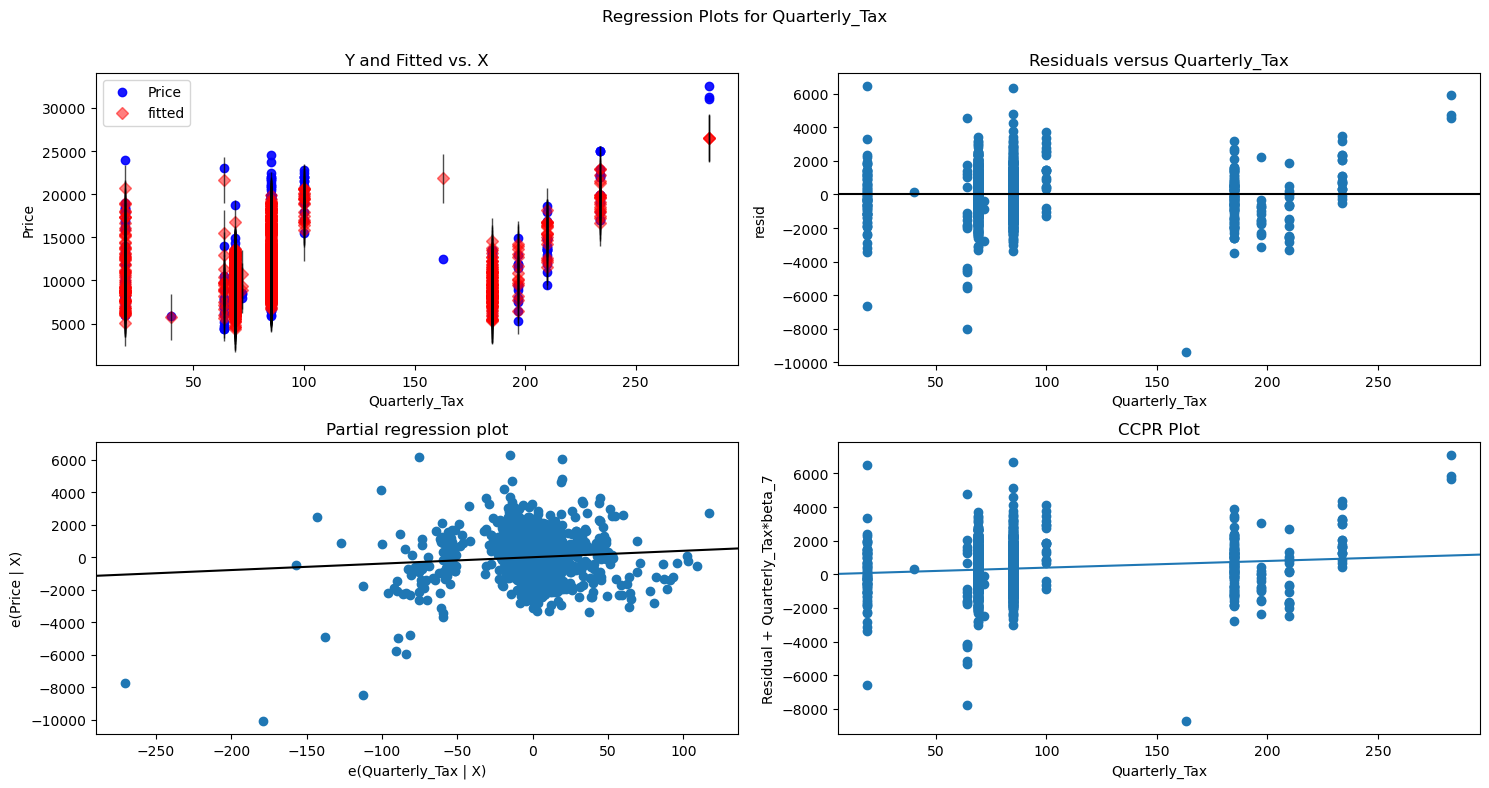

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


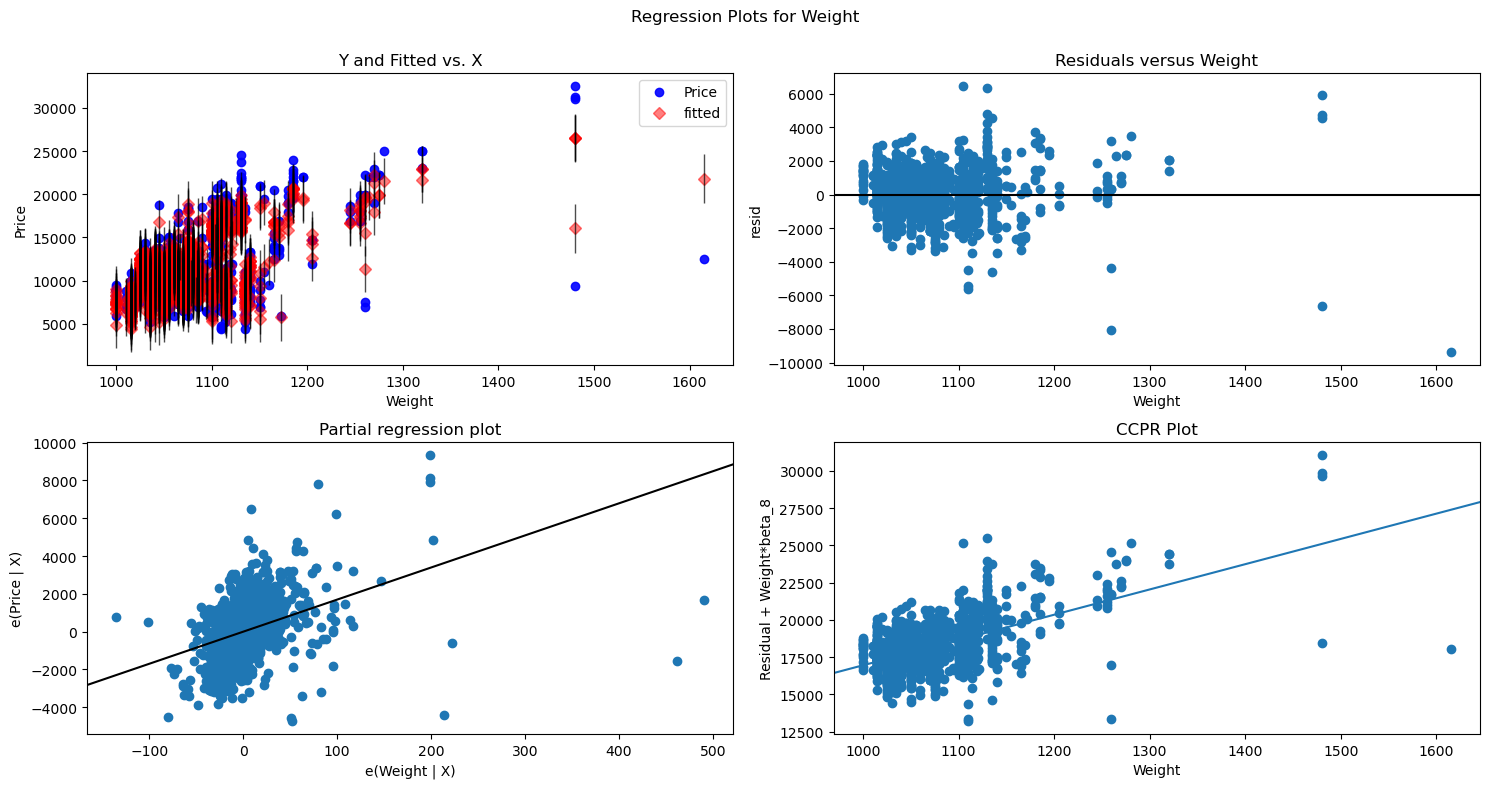

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        17:01:59   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Diagnostics

### Detecting Outliers

### cooks distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [28]:
data.shape

(1436, 9)

In [29]:
K=8
N=1436
3*(K+1)/N

0.018802228412256268

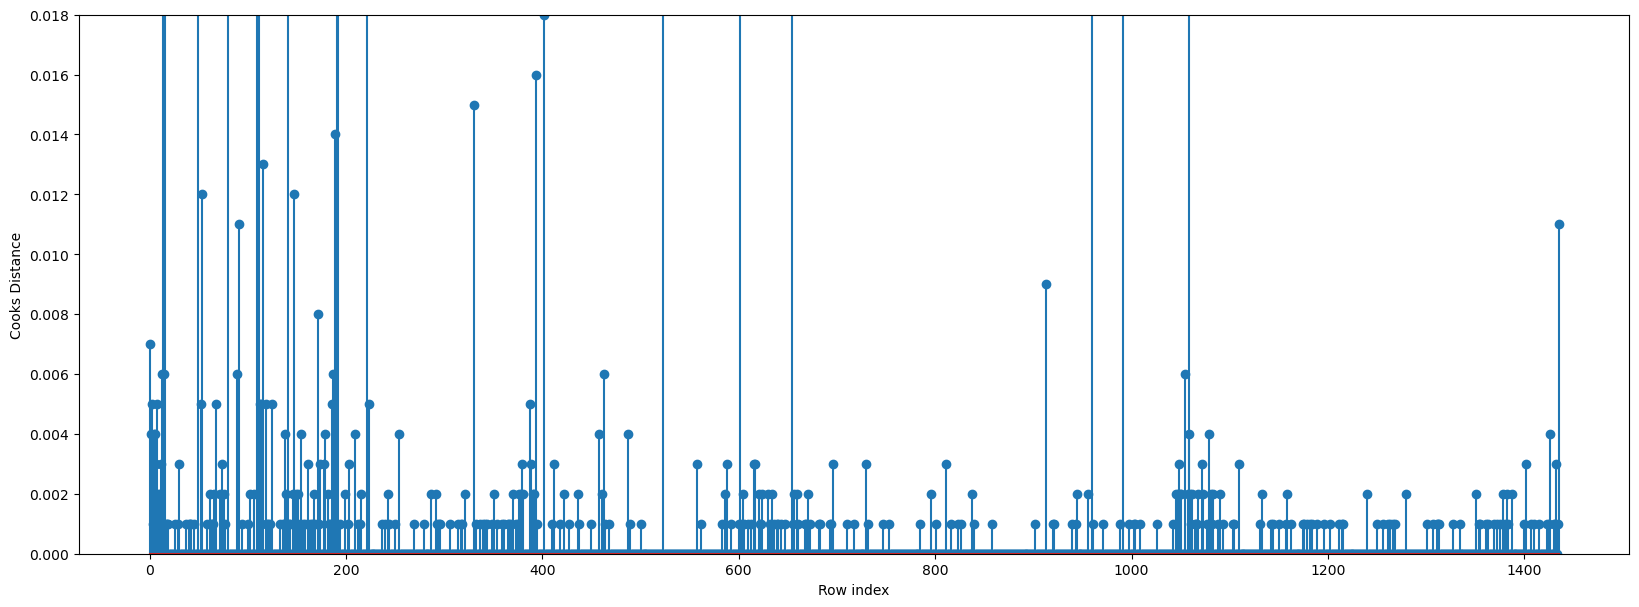

In [30]:
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.ylim(0,0.018)
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(80, 79.52010624138978)

In [32]:
np.where(c>0.0188)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [33]:
data1=data.drop(data.index[[14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058]],axis=0).reset_index()

In [34]:
data1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1414,1431,7500,69,20544,86,1300,3,5,69,1025
1415,1432,10845,72,19000,86,1300,3,5,69,1015
1416,1433,8500,71,17016,86,1300,3,5,69,1015
1417,1434,7250,70,16916,86,1300,3,5,69,1015


In [35]:
data1=data1.drop(['index'],axis=1)

In [36]:
final_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        17:02:00   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age_08_04      -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM               -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP               28.9815      2.768     10.472      0.000      23.552      34.410
cc               -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors          -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears           308.8824    180.506      1.711      0.087     -45.206     662.971
Quarterly_Tax     2.1111      1.358      1.555      0.120      -0.553       4.775
Weight           31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
(final_model.rsquared,final_model.aic)

(0.8876657300062551, 24047.875456639104)

# predicting for new data

In [39]:
cars_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
final_model.predict(cars_new)

1    17863.023287
dtype: float64

In [40]:
final_model.predict()

array([16310.88867287, 15857.33613898, 16291.65868786, ...,
        8706.72150273,  8819.8917933 , 10878.10722782])

In [41]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        17:05:21   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
Age_08_04      -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM               -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP               28.9815      2.768     10.472      0.000      23.552      34.410
cc               -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors          -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears           308.8824    180.506      1.711      0.087     -45.206     662.971
Quarterly_Tax     2.1111      1.358      1.555      0.120      -0.553       4.775
Weight           31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
final_model.params

Intercept       -14402.013312
Age_08_04         -111.422564
KM                  -0.017477
HP                  28.981490
cc                  -3.351899
Doors             -131.753290
Gears              308.882437
Quarterly_Tax        2.111073
Weight              31.416132
dtype: float64